<font size="6px" font color="blue" face="Times New Roman"><center><b>Mahalanobis Distance</b></font></center>

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [14]:
################PACOTES################
% matplotlib inline
from sympy import *
import numpy as np
from numpy.linalg import inv
import math 
from math import sqrt
import pylab as py
import matplotlib
import matplotlib.pyplot as plt
import random
from random import shuffle
import scipy as sp
from scipy import misc
from IPython.display import Latex
#####################################

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<font size="4px" font color="black" face="Times New Roman"><b>A distância de Mahalanobis</b></font>

A distância de Mahalanobis é também conhecida como a distância quadrática. Ela mede a separação entre dois grupos de objetos. Suponhamos que nós tenhamos dois grupos de objetos com médias $\bar{x}_{i}$ e $\bar{x}_{j}$, a distância de Mahalanobis é dado pelo seguinte enunciado:

\begin{equation}
d_{ij}=[(\bar{x}_{i}-\bar{x}_{j})^{T}\textbf{S}^{-1}(\bar{x}_{i}-\bar{x}_{j})]^{\frac{1}{2}}
\end{equation}

Os dados dos dois grupos devem ter o mesmo número de variáveis (o mesmo número de colunas), mas não necessariamente o mesmo número de dados (cada grupo pode possuir diferentes número de linhas).

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [15]:
GroupI= np.loadtxt(fname='MahalanobisI.txt', delimiter=',')
print(GroupI, 'Grupo I' )
GroupII=np.loadtxt(fname='MahalanobisII.txt', delimiter=',')
print(GroupII, 'Grupo II')
X1= GroupI[:,0]
print(X1, 'x1')
Y1=GroupI[:,1]
print(Y1, 'y1')
X2=GroupII[:,0]
print(X2,'x2')
Y2=GroupII[:,1]
print(Y2,'y2')

(array([[ 2.,  2.],
       [ 2.,  5.],
       [ 6.,  5.],
       [ 7.,  3.],
       [ 4.,  7.],
       [ 6.,  4.],
       [ 5.,  3.],
       [ 4.,  6.],
       [ 2.,  5.],
       [ 1.,  3.]]), 'Grupo I')
(array([[ 6.,  5.],
       [ 7.,  4.],
       [ 8.,  7.],
       [ 5.,  6.],
       [ 5.,  4.]]), 'Grupo II')
(array([ 2.,  2.,  6.,  7.,  4.,  6.,  5.,  4.,  2.,  1.]), 'x1')
(array([ 2.,  5.,  5.,  3.,  7.,  4.,  3.,  6.,  5.,  3.]), 'y1')
(array([ 6.,  7.,  8.,  5.,  5.]), 'x2')
(array([ 5.,  4.,  7.,  6.,  4.]), 'y2')


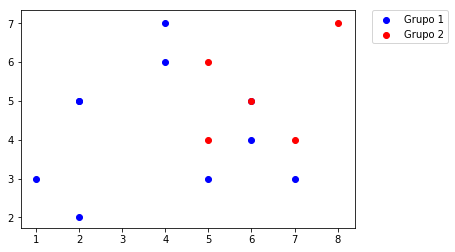

In [16]:
plt.scatter(X1, Y1, color='blue', label='Grupo 1') # Grupo 1)

plt.scatter(X2, Y2, color='red', label='Grupo 2') # Grupo 1)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()


Centralizando o dado com a média aritimética de cada variável

In [17]:
#calculando a média

X1mean = np.mean(X1)
Y1mean = np.mean(Y1)

X2mean = np.mean(X2)
Y2mean = np.mean(Y2)

print(X1mean, '-> média x1')
print(Y1mean, '-> média y1')
print(X2mean, '-> média x2')
print(Y2mean, '-> média y2')



(3.8999999999999999, '-> m\xc3\xa9dia x1')
(4.2999999999999998, '-> m\xc3\xa9dia y1')
(6.2000000000000002, '-> m\xc3\xa9dia x2')
(5.2000000000000002, '-> m\xc3\xa9dia y2')


In [18]:
#Centralizando o dado

x1 = np.array(X1-X1mean)
y1 = np.array(Y1-Y1mean)
x2 = np.array(X2-X2mean)
y2 = np.array(Y2-Y2mean)

print(x1, '->x1')
print(y1, '->y1')
print(x2, '->x2')
print(y2, '->y2')

(array([-1.9, -1.9,  2.1,  3.1,  0.1,  2.1,  1.1,  0.1, -1.9, -2.9]), '->x1')
(array([-2.3,  0.7,  0.7, -1.3,  2.7, -0.3, -1.3,  1.7,  0.7, -1.3]), '->y1')
(array([-0.2,  0.8,  1.8, -1.2, -1.2]), '->x2')
(array([-0.2, -1.2,  1.8,  0.8, -1.2]), '->y2')


A matriz covariância para o grupo $i$ é calculada usando uma matriz de dados centralizada $\hat{\textbf{X}}$.



\begin{equation}
\textbf{C}_{i}=\dfrac{1}{n_{i}} \hat{\textbf{X}}^{T}\hat{\textbf{X}}
\end{equation}

In [19]:
#Calculando a covariância para o Grupo 1 (Ela indica o quanto duas variáveis variam juntas)

#transpondo o vetor x1
x1T=x1.transpose()
#print(x1T,'->x1 Transposta')
#transpondo o vetor y1
y1T=y1.transpose()
#print(y1T,'->y1 Transposta')

#Calculando a Covariância

x1x1cov=np.dot(x1T,x1)/10
print(x1x1cov,'->Covariancia grupo 1, classe 1')

y1y1cov=np.dot(y1T,y1)/10
print(y1y1cov,'->covariancia grupo 1, classe 2')

x1y1cov=np.dot(x1T,y1)/10
print(x1y1cov,'->covariancia grupo 1, classe 3')

y1x1cov=np.dot(y1T,x1)/10
print(y1x1cov,'->covariancia grupo 1, classe 4')


(3.8900000000000006, '->Covariancia grupo 1, classe 1')
(2.21, '->covariancia grupo 1, classe 2')
(0.13000000000000006, '->covariancia grupo 1, classe 3')
(0.13000000000000006, '->covariancia grupo 1, classe 4')


In [20]:
#Calculando a covariância para o Grupo 2 (Ela indica o quanto duas variáveis variam juntas)

#transpondo o vetor x1 
x2T=x2.transpose()
#print(x2T,'->x2 Transposta')
#transpondo o vetor y1
y2T=y2.transpose()
#print(y2T,'->y2 Transposta')

#Calculando a Covariância

x2x2cov=np.dot(x2T,x2)/5
print(x2x2cov,'->Covariancia grupo 2, classe 1')

y2y2cov=np.dot(y2T,y2)/5
print(y2y2cov,'->covariancia grupo 2, classe 2')

x2y2cov=np.dot(x2T,y2)/5
print(x2y2cov,'->covariancia grupo 2, classe 3')

y2x2cov=np.dot(y2T,x2)/5
print(y2x2cov,'->covariancia grupo 2, classe 4')

(1.3599999999999999, '->Covariancia grupo 2, classe 1')
(1.3599999999999999, '->covariancia grupo 2, classe 2')
(0.55999999999999994, '->covariancia grupo 2, classe 3')
(0.55999999999999994, '->covariancia grupo 2, classe 4')


A matriz de covariancia agrupada $\textbf{S}$(Pooled Covariance Matrix) dos dois grupos (r,s) é computada como a média ponderada das matrizes de covariância:

\begin{equation}
\textbf{S}_{i}(r,s)=\dfrac{1}{n}\sum^{g}_{i=1}n_{i}c_{i}(r,s)
\end{equation}

No caso desde trabalho, foi usada a média ponderada $\frac{10}{15} C_{1} + \frac{5}{15} C_{2}$, onde $C_{1}$ e $C_{2}$ representam os grupos $1$ e $2$ respectivamente.


In [65]:
#Calculando a matriz de covariância agrupada:

S11=(10./15.)*x1x1cov+(5./15.)*x2x2cov
S12=(10./15.)*x1y1cov+(5./15.)*x2y2cov
S21=(10./15.)*y1x1cov+(5./15.)*y2x2cov
S22=(10./15.)*y1y1cov+(5./15.)*y2y2cov

print(S11) 
print(S12)
print(S21)
print(S22)

S=np.matrix([[S11,S12],[S21,S22]])

print(S,'->Matriz de covariancia agrupada')

#Calculando a inversa da matriz de covariância agrupada:

INVS=inv(S)
print(INVS,'->Matriz de covariância agrupada invertida')

3.04666666667
0.273333333333
0.273333333333
1.92666666667
(matrix([[ 3.04666667,  0.27333333],
        [ 0.27333333,  1.92666667]]), '->Matriz de covariancia agrupada')
(matrix([[ 0.33245905, -0.04716547],
        [-0.04716547,  0.52572244]]), '->Matriz de covari\xc3\xa2ncia agrupada invertida')


In [45]:
#Diferença das médias:
G1=(X1mean-X2mean)
G2=(Y1mean-Y2mean)
print(G1,'->Diferença das médias entre a propriedade X dos grupos 1 e 2')
print(G2,'->Diferença das médias entre a propriedade Y dos grupos 1 e 2')

(-2.3000000000000003, '->Diferen\xc3\xa7a das m\xc3\xa9dias entre a propriedade X dos grupos 1 e 2')
(-0.90000000000000036, '->Diferen\xc3\xa7a das m\xc3\xa9dias entre a propriedade Y dos grupos 1 e 2')


In [70]:
#Cálculo da distância de Mahalanobis:
#Mahala=sqrt((G1-G2).transpose()*(G1-G2))
Mahala=sqrt(np.dot((G1-G2).transpose(),INVS)*(G1-G2))
print(Mahala)#falta colocar o S-1 na equação

TypeError: only length-1 arrays can be converted to Python scalars

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Referências:
- http://people.revoledu.com/kardi/tutorial/Similarity/MahalanobisDistance.html (acesso em 30/03/2017)